In this assignment we will explore word vectors. In natural language processing, we represent each word as a vector consisting of numbers. The vector encodes the meaning of the word. These numbers (or weights) for each word are learned using various machine learning models, which we will explore in more detail later in this specialization. Rather than make you code the machine learning models from scratch, we will show you how to use them. In the real world, you can always load the trained word vectors, and you will almost never have to train them from scratch. In this assignment you will

In [ ]:
!pip install gensim

In [ ]:
!pip install python-Levenshtein

     |████████████████████████████████| 50 kB 2.8 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149859 sha256=294e25080b8ab66fda6466a6986835a284e5f11000041156824d6cd0df162700
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


In [ ]:
!pip install nltk

In [ ]:
import gensim
import pandas as pd
import string
import nltk
from nltk.tokenize import RegexpTokenizer ## can remove punctuations and can tokenise the sentence
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download("wordnet")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
data= pd.read_csv(r"https://raw.githubusercontent.com/nitinkaushik01/Natural_Language_Processing/master/IMDB_Dataset.csv")

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.shape

(50000, 2)

In [ ]:
\w+ matches any word character (equal to [a-zA-Z0-9_])

+ Quantifier — Matches between one and unlimited times, as many times as possible, giving back as needed

In [ ]:
indv_lines=data["review"].values.tolist()
def tokenise_(corpus):
  reviews=[]
  tokeniser= RegexpTokenizer(r"\w+")
  lemmetizer= nltk.WordNetLemmatizer()
  for lines in corpus:
    # create word tokens as well as remove punctuations in one go
    tokens= tokeniser.tokenize(lines)   
    # convert words to lower case
    words=[w.lower() for w in tokens]    
    # get a list of stop words
    stop_words=set(stopwords.words("english"))
    #remove stopwords
    word=[lemmetizer.lemmatize(word) for word in words if word not in stop_words]
    reviews.append(word)
  return reviews

In [ ]:
review_data_list=tokenise_(indv_lines)


In [ ]:
len(review_data_list)

50000

size: The number of dimensions of the embeddings and the default is 100.

window: The maximum distance between a target word and words around the target word. The default window is 5.

min_count: The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.

workers: The number of partitions during training and the default workers is 3.

sg: The training algorithm, either CBOW(0) or skip gram(1). The default training algorithm is CBOW.

In [ ]:
#Train a Word2Vec model using Gensim
#ONCE we have vectors
#step 3 - build model
#3 main tasks that vectors help with
#DISTANCE, SIMILARITY, RANKING

# Dimensionality of the resulting word vectors.
#more dimensions, more computationally expensive to train
#but also more accurate
#more dimensions = more generalized
num_features = 300
# Minimum word count threshold.
min_word_count = 3

# Number of threads to run in parallel.
#more workers, faster we train
# Context window length.
context_size = 3
# Downsample setting for frequent words.
#0 - 1e-5 is good for this
downsampling = 1e-3

# Seed for the RNG, to make the results reproducible.
#random number generator
#deterministic, good for debugging
seed = 1
import gensim

#train word2vec model
model = gensim.models.Word2Vec(sentences = review_data_list, size = num_features, window=3 ,workers = 4, min_count = 3,sg=1)
#Vocabulary size
vocab = list(model.wv.vocab)
print('Here is the Vocabulary Size.. %d' % len(vocab))

Here is the Vocabulary Size.. 45164


In [ ]:
#Finding similar words
model.wv.most_similar('amazing')

[('phenomenal', 0.6696441173553467),
 ('incredible', 0.6620602011680603),
 ('fantastic', 0.657010555267334),
 ('exceptional', 0.6476923227310181),
 ('spellbinding', 0.6415292024612427),
 ('stunning', 0.6399350166320801),
 ('awesome', 0.6310781240463257),
 ('fabulous', 0.6245585680007935),
 ('astounding', 0.623773455619812),
 ('extraordinary', 0.6218042373657227)]

In [ ]:
model.wv.most_similar('awful')



[('terrible', 0.7220048904418945),
 ('dreadful', 0.7070522308349609),
 ('atrocious', 0.6947644948959351),
 ('abysmal', 0.6933068633079529),
 ('horrid', 0.685722827911377),
 ('lousy', 0.6735601425170898),
 ('horrendous', 0.6734046936035156),
 ('horrible', 0.6564496755599976),
 ('deplorable', 0.6553423404693604),
 ('woeful', 0.6497241258621216)]

In [ ]:
model.wv.most_similar_cosmul(positive=['movie','terrible'], negative=['plot'])


[('horrible', 0.9992160201072693),
 ('deplorable', 0.9739621877670288),
 ('darkhunters', 0.9578293561935425),
 ('stv', 0.942035436630249),
 ('geez', 0.9376330375671387),
 ('gigli', 0.9362667202949524),
 ('flex', 0.9359871745109558),
 ('abomination', 0.9349026679992676),
 ('seagals', 0.9307712912559509),
 ('atleast', 0.9292811751365662)]

In [ ]:
#Finding the odd word out from the list of words given
print(model.wv.doesnt_match("man woman car".split()))



car


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [ ]:
model.wv.vocab.keys()

dict_keys(['one', 'reviewer', 'mentioned', 'watching', '1', 'oz', 'episode', 'hooked', 'right', 'exactly', 'happened', 'br', 'first', 'thing', 'struck', 'brutality', 'unflinching', 'scene', 'violence', 'set', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'pull', 'punch', 'regard', 'drug', 'sex', 'hardcore', 'classic', 'use', 'called', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'focus', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'privacy', 'high', 'agenda', 'em', 'home', 'many', 'aryan', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', 'scuffle', 'death', 'stare', 'dodgy', 'dealing', 'shady', 'agreement', 'never', 'far', 'away', 'would', 'say', 'main', 'appeal', 'due', 'fact', 'dare', 'forget', 'pretty', 'picture', 'painted', 'mainstream', 'audience', 'charm', 'romance', 'mess', 'around', 'ever', 'saw', 'nasty', 'surreal', 'ready', 'watched', 'developed', 'taste', 'got', 'accustomed

In [ ]:
import matplotlib.pyplot as plt
#Extracting the list of word vectors, limiting to 5000, each is of 300 dimensions
word_vectors = [model[w] for w in list(model.wv.vocab.keys())[:5000]]
# Reducing dimensionality by converting the vectors to 2d vectors
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(word_vectors)

# Storing data in a dataframe
tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
tsne_df['words'] = list(model.wv.vocab.keys())[:5000]
print(tsne_df)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.002s...
[t-SNE] Computed neighbors for 5000 samples in 1.755s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.393307
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.385040
[t-SNE] KL divergence after 1000 iterations: 2.879287
              x          y      words
0     10.215111 -24.140713        one
1     16.437717 -39.700253   reviewer
2     -7.714514   5.932319  mentioned
3      6.969521 -29.715010   watching
4      6.612072 -48.760292          1
...         ...        ...        ...
4995  44.350510   4.327540    coleman
4996 -32.623951  -1.541676  howlingly
4997   3.979833 -29.584879

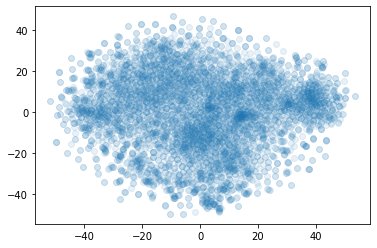

In [ ]:
# Corresponding word appears when you hover on the data point.
plt.scatter(x='x', y='y', alpha= .1, data=tsne_df)
plt.show()

## 1.0 Predict the Countries from Capitals
1.1 Importing the data

As usual, you start by importing some essential Python libraries and the load dataset. The dataset will be loaded as a Pandas DataFrame, which is very a common method in data science. Because of the large size of the data, this may take a few minutes.

In [ ]:
!unzip /content/drive/MyDrive/sample.zip

Archive:  /content/drive/MyDrive/sample.zip
  inflating: word_embeddings_subset.p  
  inflating: en-fr.txt               
  inflating: capitals.txt            


In [ ]:
# Run this cell to import packages.
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/capitals.txt', delimiter=' ')
data.columns = ['city1', 'country1', 'city2', 'country2']

# print first five elements in the DataFrame
data.head(50)

,city1,country1,city2,country2
0,Athens,Greece,Bangkok,Thailand
1,Athens,Greece,Beijing,China
2,Athens,Greece,Berlin,Germany
3,Athens,Greece,Bern,Switzerland
4,Athens,Greece,Cairo,Egypt
5,Athens,Greece,Canberra,Australia
6,Athens,Greece,Hanoi,Vietnam
7,Athens,Greece,Havana,Cuba
8,Athens,Greece,Helsinki,Finland
9,Athens,Greece,Islamabad,Pakistan


In [ ]:
data.shape

(4951, 4)

In [ ]:
# Now we will load the word embeddings as a Python dictionary. As stated, these have already been obtained through a machine learning algorithm. 


In [ ]:
word_embeddings = pickle.load(open("/content/word_embeddings_subset.p", "rb"))
len(word_embeddings)  

243

In [ ]:
print("dimension: {}".format(word_embeddings['Spain'].shape[0]))

dimension: 300


Predict relationships among words

Now you will write a function that will use the word embeddings to predict relationships among words.

    The function will take as input three words.
    The first two are related to each other.
    It will predict a 4th word which is related to the third word in a similar manner as the two first words are related to each other.
    As an example, "Athens is to Greece as Bangkok is to __"?
    You will write a program that is capable of finding the fourth word.
    We will give you a hint to show you how to compute this.


In [ ]:
king = word_embeddings['king']
queen = word_embeddings['queen']


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cosine_similarity(king.reshape(1,-1),queen.reshape(1,-1))

array([[0.6510957]], dtype=float32)

In [ ]:
def get_country(city1, country1, city2, embeddings, cosine_similarity=cosine_similarity):
    """
    Input:
        city1: a string (the capital city of country1)
        country1: a string (the country of capital1)
        city2: a string (the capital city of country2)
        # CODE REVIEW COMMENT: Embedding incomplete code comment, should add "and values are their emmbeddings"
        embeddings: a dictionary where the keys are words and
    Output:
        countries: a dictionary with the most likely country and its similarity score
    """
    ### START CODE HERE ###

    # store the city1, country 1, and city 2 in a set called group
    group = set([city1,country1,city2])

    # get embeddings of city 1
    city1_emb = word_embeddings[city1]

    # get embedding of country 1
    country1_emb = word_embeddings[country1]

    # get embedding of city 2
    city2_emb = word_embeddings[city2]

    # get embedding of country 2 (it's a combination of the embeddings of country 1, city 1 and city 2)
    # Remember: King - Man + Woman = None
    vec = country1_emb-city1_emb +city2_emb

    # Initialize the similarity to -1 (it will be replaced by a similarities that are closer to +1)
    similarity = -1

    # initialize country to an empty string
    country = ''

    # loop through all words in the embeddings dictionary
    for word in embeddings.keys():

        # first check that the word is not already in the 'group'
        if word not in group:

            # get the word embedding
            word_emb = word_embeddings[word]

            # calculate cosine similarity between embedding of country 2 and the word in the embeddings dictionary
            cur_similarity = cosine_similarity(vec.reshape(1,-1),word_emb.reshape(1,-1))

            # if the cosine similarity is more similar than the previously best similarity...
            if cur_similarity > similarity:

                # update the similarity to the new, better similarity
                similarity = cur_similarity

                # store the country as a tuple, which contains the word and the similarity
                country = (word,similarity)

    ### END CODE HERE ###

    return country

In [ ]:
# Testing your function, note to make it more robust you can return the 5 most similar words.
get_country('Athens', 'Greece', 'Cairo', word_embeddings)

('Egypt', array([[0.7626822]], dtype=float32))

In [ ]:
# Testing your function, note to make it more robust you can return the 5 most similar words.
get_country('Athens', 'Greece', 'Lisbon', word_embeddings)

('Portugal', array([[0.702907]], dtype=float32))

In [ ]:
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town',
         'village', 'country', 'continent', 'petroleum', 'joyful']

# given a list of words and the embeddings, it returns a matrix with all the embeddings
word_embds=[]
for word in words:
  embds=word_embeddings[word]
  word_embds.append(embds)

X=np.array(word_embds)

print('You have 11 words each of 300 dimensions thus X.shape is:', X.shape)

You have 11 words each of 300 dimensions thus X.shape is: (11, 300)


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)

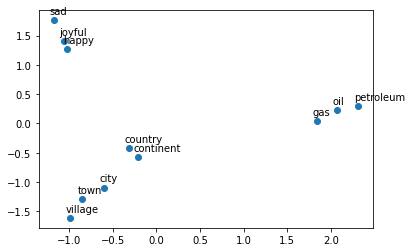

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(X_pca[i, 0] - 0.05, X_pca[i, 1] + 0.1))

plt.show()